Some Markdown text with <span style="color:blue">some *blue* text</span>.


# <span style="color:blue">UN Data Exploration Project</span>

1. Download two CSV files and place them in the data folder of your local
Data Question 1 repository:

a. Gross Domestic Product (GDP) per capita:
http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY
.GDP.PCAP.PP.KD
• DO NOT APPLY ANY FILTERS
• rename the file to gdp_per_capita.csv
• open it with a text editor (not Excel) and take a look

b. Percentage of Individuals using the Internet:
http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H
• DO NOT APPLY ANY FILTERS
• rename the file to internet_use.csv
• open it with a text editor (not Excel) and take a look
### <span style="color:green">Done</span>


2. Create a Jupyter Notebook in the notebooks folder and name it
UN_Data_Exploration.

• You are likely to get errors along the way. When you do, read the
errors to try to understand what is happening and how to correct it.
• Use markdown cells to record your answers to any questions asked
in this exercise. On the menu bar, you can toggle the cell type from
‘Code’ to ‘Markdown’. Here is a link to a cheat sheet showing the
basics of styling text using Markdown.

### <span style="color:green">Done</span>

3. In the first cell of your notebook, import the required packages with their
customary aliases as follows:
    
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as stats

import statsmodels.api as sm

Keep all imports in this cell at the top of your notebook.

4. At the bottom of your imports cell, use the %matplotlib inline magic
command so that your plots show in the notebook without having to call
plt.show() every time.

### <span style="color:green">Done</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline
pd.options.display.max_rows = 999

5. Using the pandas read_csv() function, read the GDP dataset into your
notebook as a DataFrame called gdp_df.

• Take a look at the first 10 rows.

• Look at the last 5 rows. Do you see a problem?

• Redo the read_csv() call to correct this issue - do not modify the
original csv file.

### <span style="color:green">Done</span>


In [2]:
gdp_df = pd.read_csv("../gdp_per_capita.csv")

gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN


In [3]:
gdp_df.tail()
#We have unneeded rows at the bottom, need to reread the data without these

,Country or Area,Year,Value,Value Footnotes
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN
6729,footnoteSeqID,Footnote,NaN,NaN
6730,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [4]:
gdp_df.shape

(6731, 4)

In [5]:
gdp_df = pd.read_csv("../gdp_per_capita.csv", nrows=6729)
#gdp_df = pd.read_csv("../gdp_per_capita.csv")[: -2]

gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN


In [6]:
gdp_df.shape
#We have the correct number of rows now

(6729, 4)

In [7]:
gdp_df.tail()
#And the data at the bottom looks good

,Country or Area,Year,Value,Value Footnotes
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


6. Drop the ‘Value Footnotes’ column, and rename the remaining columns to
‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

### <span style="color:green">Done</span>

In [8]:
gdp_df = gdp_df.drop(columns='Value Footnotes')

In [9]:
gdp_df = gdp_df.rename(columns = {'Country or Area' : 'Country', 'Value' : 'GDP_Per_Capita'})

In [10]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


7. How many rows and columns does gdp_df have? What are the data types
of its columns? If any of the columns are not the expected types, figure
out why and fix it.<br>

Rows: 6729
Columns: 3<br>

## <span style="color:green">Done</span>


In [11]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6729 non-null   object 
 1   Year            6729 non-null   int64  
 2   GDP_Per_Capita  6729 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


In [12]:
gdp_df['Country'].value_counts()

Samoa                                                 29
European Union                                        29
Georgia                                               29
Pakistan                                              29
El Salvador                                           29
Brazil                                                29
Antigua and Barbuda                                   29
Malawi                                                29
Oman                                                  29
Tonga                                                 29
Vietnam                                               29
Pacific island small states                           29
Burkina Faso                                          29
Iceland                                               29
Thailand                                              29
Central Europe and the Baltics                        29
Fiji                                                  29
Congo                          

8. Which years are represented in this dataset? Take a look at the number of
observations per year. What do you notice?<br>
Years: 1990-2018<br>
The number of areas reported on each year grows from 210 in 1990 to 243 in 2011, then drops to 226 in 2018.

### <span style="color:green">Done</span>


In [13]:
gdp_df.groupby("Year")["Country"].count()

Year
1990    210
1991    211
1992    213
1993    215
1994    218
1995    224
1996    224
1997    226
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    238
2005    238
2006    238
2007    239
2008    240
2009    241
2010    241
2011    243
2012    241
2013    241
2014    240
2015    240
2016    239
2017    239
2018    226
Name: Country, dtype: int64

In [14]:
print('Min Year: ' + str(gdp_df['Year'].min()))
print('Max Year: ' + str(gdp_df['Year'].max()))

Min Year: 1990
Max Year: 2018


9. How many countries are represented in this dataset? Which countries are
least represented in the dataset? Why do you think these countries have
so few observations?<br><br>
Countries: 243<br>
Countries with few values: Some of these have had civil wars in the affected time period, a few of the countries are new. Some are territories of other countries and may possibly have irregular reporting because of this.<br>
### <span style="color:green">Done</span>


In [15]:
gdp_countries = gdp_df['Country'].value_counts()
print('**Head**')
print(gdp_countries.head())
print('**Tail**')
print(gdp_countries.tail(10))
gdp_countries.shape

**Head**
Samoa             29
European Union    29
Georgia           29
Pakistan          29
El Salvador       29
Name: Country, dtype: int64
**Tail**
CuraÃ§ao                     19
Kosovo                       19
Qatar                        19
SÃ£o TomÃ© and Principe      18
Afghanistan                  17
Nauru                        12
Sint Maarten (Dutch part)     9
South Sudan                   8
Turks and Caicos Islands      8
Djibouti                      1
Name: Country, dtype: int64


(243,)

In [16]:
gdp_countries.sort_index()

Afghanistan                                           17
Albania                                               29
Algeria                                               29
Angola                                                29
Antigua and Barbuda                                   29
Arab World                                            29
Argentina                                             29
Armenia                                               29
Aruba                                                 28
Australia                                             29
Austria                                               29
Azerbaijan                                            29
Bahrain                                               29
Bangladesh                                            29
Barbados                                              29
Belarus                                               29
Belgium                                               29
Belize                         

10. Create a new dataframe by subsetting gdp_df to just the year 2014. Call
this new dataframe gdp_2014.<br>
### <span style="color:green">Done</span>

In [17]:
gdp_2014 = gdp_df[gdp_df['Year']==2014]
gdp_2014.head()

,Country,Year,GDP_Per_Capita
4,Afghanistan,2014,1795.735834
21,Albania,2014,10700.993216
50,Algeria,2014,13557.769757
79,Angola,2014,6813.052106
108,Antigua and Barbuda,2014,20440.540555


11. Use .describe() to find the summary statistics for GDP per capita in
2014.<br>
### <span style="color:green">Done</span>

In [18]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,240.0,240.000000
mean,2014.0,18034.303556
std,0.0,19320.930599
min,2014.0,672.681648
25%,2014.0,4301.187365
50%,2014.0,11868.067810
75%,2014.0,24388.408410
max,2014.0,130439.106674


12. Create a histogram of GDP Per Capita numbers for 2014 (you may wish
to adjust the number of bins for your histogram). How would you describe
the shape of the distribution?<br>

The data is right skewed with the largest group of countries under $20K GDP.<br>
### <span style="color:green">Done</span>


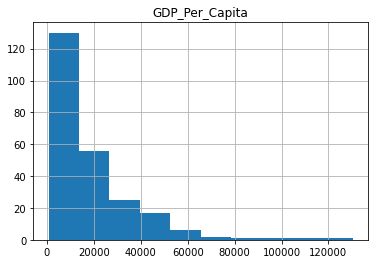

In [19]:
gdp_2014.hist('GDP_Per_Capita');

14. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017
(using the pandas .pivot_table() method or another method) so that
each row corresponds to a country, each column corresponds to a year,
and the values in the table give the GDP_Per_Capita amount. Drop any
rows that are missing values for either 1990 or 2017. Save the result to a
dataframe named gdp_pivoted.<br>
### <span style="color:green">Done</span>

In [20]:
gdp_pivoted = gdp_df[(gdp_df['Year'] == 1990) | (gdp_df['Year'] == 2017)].pivot_table(values='GDP_Per_Capita',columns='Year',index='Country').dropna()

In [21]:
gdp_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, Albania to Zimbabwe
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    209 non-null    float64
 1   2017    209 non-null    float64
dtypes: float64(2)
memory usage: 4.9+ KB


In [22]:
gdp_pivoted.shape

(209, 2)

In [23]:
gdp_pivoted.head()

Year,1990,2017
Country,,
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
Arab World,10491.507721,15542.746104


In [24]:
gdp_pivoted.index

Index(['Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Arab World',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       ...
       'Upper middle income', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'World', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=209)

15. Create a new column in gdp_pivoted named Percent_Change. This
column should contain the percent change in GDP_Per_Capita from 1990
to 2017. Hint: Percent change is calculated as 100*(New Value - Old
Value) / Old Value.<br>
### <span style="color:green">Done</span>

In [25]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]


In [26]:
gdp_pivoted.head()

Year,1990,2017,Percent_Change
Country,,,
Albania,4458.247115,11796.719185,164.604426
Algeria,10300.015042,13822.389087,34.197756
Angola,4761.229638,6044.972035,26.962413
Antigua and Barbuda,17454.549799,22400.379562,28.335476
Arab World,10491.507721,15542.746104,48.145972


16. How many countries experienced a negative percent change in GDP per
capita from 1990 to 2017?<br>
Countries with negative change in GDP: 20<br>
### <span style="color:green">Done</span>

In [27]:
gdp_pivoted[gdp_pivoted['Percent_Change'] < 0]

Year,1990,2017,Percent_Change
Country,,,
Aruba,37140.024657,35861.828118,-3.441561
Brunei,84693.336970,72523.729446,-14.369026
Burundi,1027.396660,670.777072,-34.710993
Central African Republic,982.659793,746.434942,-24.039332
Comoros,2580.500555,2555.966364,-0.950753
Congo,5323.022707,5103.142821,-4.130734
Dem. Rep. Congo,1386.933242,807.752905,-41.759785
Gabon,19556.665840,16144.935297,-17.445359
Guinea-Bissau,1633.612989,1576.748994,-3.480873


In [28]:
gdp_pivoted[gdp_pivoted['Percent_Change'] < 0].count()

Year
1990              20
2017              20
Percent_Change    20
dtype: int64

17. Which country had the highest % change in GDP per capita? Create a
line plot showing this country’s GDP per capita for all years from 1990
to 2017. Create another showing the country with the second highest %
change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.<br><br>
Highest % change in GDP: Equatorial Guinea<br>
Comparison: China has a steady rise whereas EG rises and falls again<br>
### <span style="color:green">Done</span>


In [29]:
gdp_pivoted.sort_values('Percent_Change', ascending=False)

Year,1990,2017,Percent_Change
Country,,,
Equatorial Guinea,1017.764136,22298.942144,2090.973464
China,1521.963868,15253.993071,902.257241
Myanmar,730.228038,5610.324700,668.297629
East Asia & Pacific (excluding high income),2222.407152,13544.178535,509.437318
East Asia & Pacific (IDA & IBRD),2246.661835,13686.880719,509.209651
Vietnam,1457.594613,6233.485045,327.655604
Bhutan,2259.568462,9042.907491,300.205068
Cabo Verde,1676.190288,6367.984878,279.908231
Lao PDR,1708.034226,6310.067080,269.434463


In [30]:
gdp_growth_first = gdp_df[(gdp_df['Country']=='Equatorial Guinea')]
gdp_growth_first.head()

,Country,Year,GDP_Per_Capita
1691,Equatorial Guinea,2018,20181.132964
1692,Equatorial Guinea,2017,22298.942144
1693,Equatorial Guinea,2016,24296.603580
1694,Equatorial Guinea,2015,27708.638182
1695,Equatorial Guinea,2014,31743.410748


In [31]:
gdp_growth_second = gdp_df[(gdp_df['Country'] == 'China')]
gdp_growth_second.head()

,Country,Year,GDP_Per_Capita
1126,China,2018,16181.777716
1127,China,2017,15253.993071
1128,China,2016,14368.630801
1129,China,2015,13534.846237
1130,China,2014,12725.089099


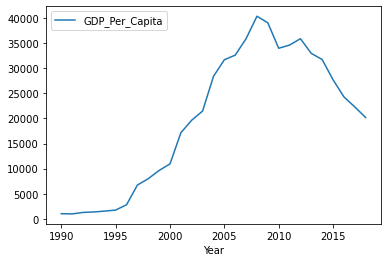

In [32]:
gdp_growth_first.plot(kind='line',x = 'Year', y = 'GDP_Per_Capita')

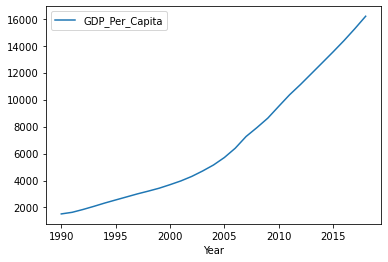

In [33]:
gdp_growth_second.plot(kind='line',x = 'Year', y = 'GDP_Per_Capita')

In [34]:
gdp_growth_top_two = gdp_df[(gdp_df['Country'] == 'Equatorial Guinea') | (gdp_df['Country'] == 'China')].pivot_table(values='GDP_Per_Capita',columns='Country',index='Year').dropna()

In [35]:
gdp_growth_top_two.head()

Country,China,Equatorial Guinea
Year,,
1990,1521.963868,1017.764136
1991,1640.874263,975.558189
1992,1851.315492,1272.159060
1993,2083.952315,1365.588482
1994,2329.474589,1538.475957


In [36]:
print(gdp_growth_top_two)

Country         China  Equatorial Guinea
Year                                    
1990      1521.963868        1017.764136
1991      1640.874263         975.558189
1992      1851.315492        1272.159060
1993      2083.952315        1365.588482
1994      2329.474589        1538.475957
1995      2556.604860        1743.205357
1996      2781.130626        2796.398459
1997      3006.918054        6721.724501
1998      3211.623211        7991.571984
1999      3428.063172        9640.704755
2000      3689.967255       10937.697039
2001      3968.773863       17149.018503
2002      4302.226871       19655.328898
2003      4704.586800       21475.814494
2004      5149.601901       28384.466729
2005      5702.800579       31697.801471
2006      6392.373888       32618.640600
2007      7264.060036       35901.459696
2008      7924.644365       40368.079634
2009      8626.532479       39060.913034
2010      9498.079744       33990.146771
2011     10355.495713       34622.116266
2012     11115.1

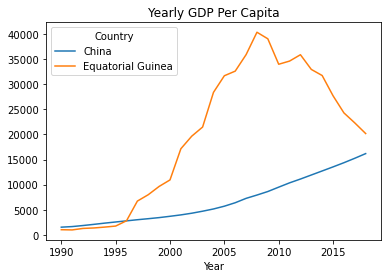

In [37]:
gdp_growth_top_two.plot(title='Yearly GDP Per Capita');

18. Read in continents.csv contained in the data folder into a new dataframe
called continents. We will be using this dataframe to add a new column
to our dataset.
### <span style="color:green">Done</span>

In [38]:
continents = pd.read_csv('../data/continents.csv')
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


19. Merge gdp_df and continents. Keep only the countries that appear in
both data frames. Save the result back to gdp_df.
### <span style="color:green">Done</span>

In [39]:
gdp_df = gdp_df.merge(continents, on='Country', how='inner')
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2018,1734.723214,Asia
1,Afghanistan,2017,1758.465636,Asia
2,Afghanistan,2016,1757.023490,Asia
3,Afghanistan,2015,1766.593077,Asia
4,Afghanistan,2014,1795.735834,Asia


20. Determine the number of countries per continent. Create a bar chart
showing this.
### <span style="color:green">Done</span>

In [40]:
unique_countries = gdp_df[['Continent','Country']].drop_duplicates(subset=['Continent','Country'],keep='first')


In [41]:
unique_countries.head()

,Continent,Country
0,Asia,Afghanistan
17,Europe,Albania
46,Africa,Algeria
75,Africa,Angola
104,North America,Antigua and Barbuda


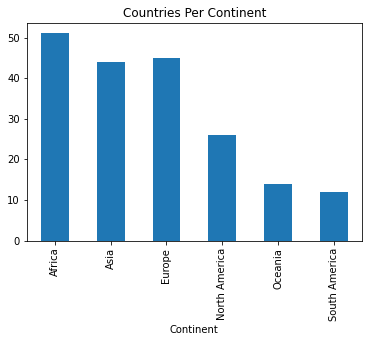

In [42]:
unique_countries.groupby('Continent')['Country'].count().plot(kind='bar', 
                       title='Countries Per Continent');
#This would be nicer if it was flipped over

21. Creat a seaborn boxplot showing GDP per capita in 2014 split out by
continent. What do you notice?<br>

*Asia has high variability with big outliers*

### <span style="color:green">Done</span>

In [43]:
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2018,1734.723214,Asia
1,Afghanistan,2017,1758.465636,Asia
2,Afghanistan,2016,1757.023490,Asia
3,Afghanistan,2015,1766.593077,Asia
4,Afghanistan,2014,1795.735834,Asia


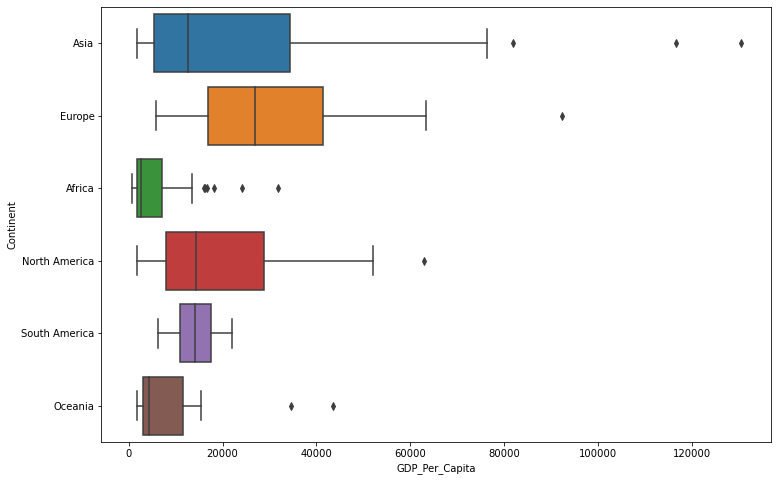

In [44]:
plt.figure(figsize=(12,8))
sns.boxplot(data=gdp_df[gdp_df['Year']==2014], x='GDP_Per_Capita', y='Continent');

In [45]:
#Do the values look realistic? Here is the sorted data:
gdp_df[gdp_df['Year']==2014].sort_values(['Continent', 'GDP_Per_Capita'])

,Country,Year,GDP_Per_Capita,Continent
927,Central African Republic,2014,672.681648,Africa
765,Burundi,2014,768.469837,Africa
1240,Dem. Rep. Congo,2014,784.872656,Africa
3440,Niger,2014,900.136918,Africa
2837,Malawi,2014,1142.530804,Africa
3225,Mozambique,2014,1222.452874,Africa
2687,Liberia,2014,1257.625441,Africa
1548,Ethiopia,2014,1413.962518,Africa
4734,Togo,2014,1423.553002,Africa
1896,Guinea-Bissau,2014,1425.770644,Africa


In [46]:
#Here is a summary of the min and max per continent for 2014
gdp_df[gdp_df['Year']==2014].groupby('Continent').agg({'GDP_Per_Capita':(min, max)})

GDP_Per_Capita               
                         min            max
Continent                                  
Africa            672.681648   31743.410748
Asia             1795.735834  130439.106674
Europe           5711.282367   92349.186429
North America    1656.315765   62929.873118
Oceania          1814.758995   43651.103133
South America    6239.548296   22013.851112

22. Read in internet_use.csv into a DataFrame called internet_df. You will
most likely get an error message when doing this - figure out what is going
wrong and fix it. Take a look at the first and last five rows and make any
corrections to your read_csv() call to fix this. Again, do not modify the
original datasets.
### <span style="color:green">Done</span>

In [47]:
internet_df = pd.read_csv('../internet_use.csv', 
                          names=list(['Country or Area', 'Year', 'Value', 'Value Footnotes']), nrows=4496)

This file has footnotes, which produced the following error:
    ParserError: Error tokenizing data. C error: Expected 4 fields in line 4675, saw 6
Reread the file without the footnote rows. Note that if you look at the file in a text editor, the actual problem is not on row 4675; that's just how the read_csv is interpreting the rows.

In [48]:
internet_df.head()


,Country or Area,Year,Value,Value Footnotes
0,Country or Area,Year,Value,Value Footnotes
1,Afghanistan,2014,6.39,NaN
2,Afghanistan,2013,5.9,NaN
3,Afghanistan,2012,5.45454545454545,NaN
4,Afghanistan,2011,5,NaN


In [49]:
#the method above puts the header row as a data row, so remove it
internet_df = internet_df[1:4496]
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
1,Afghanistan,2014,6.39,NaN
2,Afghanistan,2013,5.9,NaN
3,Afghanistan,2012,5.45454545454545,NaN
4,Afghanistan,2011,5,NaN
5,Afghanistan,2010,4,NaN


In [50]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4491,Zimbabwe,1997,0.033080326724463,NaN
4492,Zimbabwe,1996,0.016790483892511,NaN
4493,Zimbabwe,1995,0.00768353991953285,NaN
4494,Zimbabwe,1994,0.00173927955909959,NaN
4495,Zimbabwe,1990,0,NaN


23. Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.
### <span style="color:green">Done</span>

In [51]:
internet_df = internet_df.drop(columns='Value Footnotes')
#gdp_df = gdp_df.drop(columns='Value Footnotes')

In [52]:
internet_df = internet_df.rename(columns = {'Country or Area' : 'Country', 'Value' : 'Internet_Users_Pct'})
internet_df.head()

,Country,Year,Internet_Users_Pct
1,Afghanistan,2014,6.39
2,Afghanistan,2013,5.9
3,Afghanistan,2012,5.45454545454545
4,Afghanistan,2011,5
5,Afghanistan,2010,4


24. How many rows and columns does this new dataset have? What are the
types of its columns? Ensure that the Internet_Users_Pct column is a
numeric data type and fix it if it is not.
### <span style="color:green">Done</span>

In [53]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 1 to 4495
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             4495 non-null   object
 1   Year                4495 non-null   object
 2   Internet_Users_Pct  4495 non-null   object
dtypes: object(3)
memory usage: 105.5+ KB


In [54]:
#To inspect the non-numeric data:
#This will show any rows where string data is anything other than a number or null.
#We don't find any here because the last data frame is empty.
print(pd.to_numeric(internet_df['Internet_Users_Pct'], errors='coerce'))
print(pd.to_numeric(internet_df['Internet_Users_Pct'], errors='coerce').isnull())
print(internet_df[pd.to_numeric(internet_df['Internet_Users_Pct'], errors='coerce').isnull()])

1       6.390000
2       5.900000
3       5.454545
4       5.000000
5       4.000000
          ...   
4491    0.033080
4492    0.016790
4493    0.007684
4494    0.001739
4495    0.000000
Name: Internet_Users_Pct, Length: 4495, dtype: float64
1       False
2       False
3       False
4       False
5       False
        ...  
4491    False
4492    False
4493    False
4494    False
4495    False
Name: Internet_Users_Pct, Length: 4495, dtype: bool
Empty DataFrame
Columns: [Country, Year, Internet_Users_Pct]
Index: []


In [55]:
#Demo of the above method
d = {
 'unit': ['UD', 'UD', 'UD', 'UD', 'UD','UD'],
 'N-D': [ 'Q1', 'Q2', 'Q3', 'Q4','Q5','Q6'],
 'num' : [ -1.48, 1.7, -6.18, 0.25, 'sum(d)', 0.25]

}
df = pd.DataFrame(d)
#Force everything to a number
print (pd.to_numeric(df['num'], errors='coerce'))
#Make a boolean of the above operation
print (pd.to_numeric(df['num'], errors='coerce').isnull())
#Filter by the true values from the boolean, showing the non-number, non-null text data
print (df[pd.to_numeric(df['num'], errors='coerce').isnull()])

0   -1.48
1    1.70
2   -6.18
3    0.25
4     NaN
5    0.25
Name: num, dtype: float64
0    False
1    False
2    False
3    False
4     True
5    False
Name: num, dtype: bool
  unit N-D     num
4   UD  Q5  sum(d)


In [56]:
internet_df['Internet_Users_Pct'] = pd.to_numeric(internet_df['Internet_Users_Pct'], errors='coerce')
internet_df['Year']=pd.to_numeric(internet_df['Year'], errors='coerce')

In [57]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 1 to 4495
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


25. What is the first year that has a nonzero internet users percentage reported?
What is the general trend in internet users percentage over the years. Pick
a visualization that you think illustrates this trend well.

First year of internet usage: 1990
### <span style="color:green">Done</span>

In [58]:
internet_df[internet_df['Internet_Users_Pct']>0].sort_values(['Year','Internet_Users_Pct']).head()

,Country,Year,Internet_Users_Pct
376,Belgium,1990,0.001007
3721,Spain,1990,0.012874
2049,Italy,1990,0.017545
2096,Japan,1990,0.020294
2218,Korea (Rep. of),1990,0.023265


In [59]:
mean_pct_users = internet_df[internet_df['Internet_Users_Pct']>0].groupby('Year')['Internet_Users_Pct'].mean().to_frame().reset_index()
mean_pct_users = mean_pct_users.rename(columns = {'Internet_Users_Pct':'Mean_Internet_Users_Pct'})
mean_pct_users.head()


,Year,Mean_Internet_Users_Pct
0,1990,0.264891
1,1991,0.352641
2,1992,0.463997
3,1993,0.548085
4,1994,0.757138


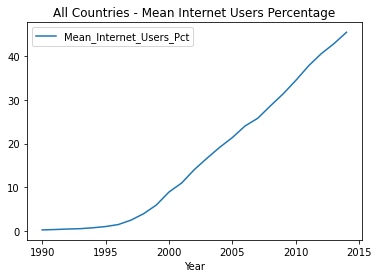

In [60]:
mean_pct_users.plot(kind='line', x='Year', title='All Countries - Mean Internet Users Percentage');


26. Merge gdf_df and internet_df (on Country and Year) into a single
DataFrame named gdp_and_internet_use. Keep only countries and years
that appear in both tables.
Difficult Bonus: Do not attempt this part until you have completed all
other portions of the data question. Some countries have slightly different
names in the internet use and gdp dataframes. For example, the Central
African Republic is “Central African Republic” in the gdp dataframe and
“Central African Rep.” in the internet use dataframe. Find as many
instances like this as you can and resolve them so that when merging you
keep the maximum number of countries possible.
### <span style="color:green">Done</span>

In [61]:
gdp_and_internet_use = gdp_df.merge(internet_df, on=(['Country', 'Year']))

27. Look at the first five rows of your new data frame to confirm it merged
correctly. Also, check the last five rows to make sure the data is clean and
as expected.
### <span style="color:green">Done</span>

In [62]:
print(gdp_and_internet_use.head())
print(gdp_and_internet_use.tail())

       Country  Year  GDP_Per_Capita Continent  Internet_Users_Pct
0  Afghanistan  2014     1795.735834      Asia            6.390000
1  Afghanistan  2013     1807.762344      Asia            5.900000
2  Afghanistan  2012     1772.764974      Asia            5.454545
3  Afghanistan  2011     1626.764793      Asia            5.000000
4  Afghanistan  2010     1671.581238      Asia            4.000000
       Country  Year  GDP_Per_Capita Continent  Internet_Users_Pct
3514  Zimbabwe  1997     3036.422224    Africa            0.033080
3515  Zimbabwe  1996     2985.856605    Africa            0.016790
3516  Zimbabwe  1995     2736.486436    Africa            0.007684
3517  Zimbabwe  1994     2768.309953    Africa            0.001739
3518  Zimbabwe  1990     2819.549467    Africa            0.000000


28. Create a new DataFrame, named gdp_and_internet_use_2014 by extracting data for the year 2014 from gdp_and_internet_use. What is the
mean internet users percentage in 2014? How many countries have at least
90% internet users in 2014?

<span style="color:darkgreen">
Mean internet users percentage = 44.7
Countries with at least 90% internet users = 12
</span>

### <span style="color:green">Done</span>

In [63]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year']==2014]
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.39
13,Albania,2014,10700.993216,Europe,60.10
34,Algeria,2014,13557.769757,Africa,18.09
56,Angola,2014,6813.052106,Africa,21.26
76,Antigua and Barbuda,2014,20440.540555,North America,64.00


In [64]:
gdp_and_internet_use_2014['Internet_Users_Pct'].mean()

44.673536463414635

In [65]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct']>=90].count()

Country               12
Year                  12
GDP_Per_Capita        12
Continent             12
Internet_Users_Pct    12
dtype: int64

29. Find the countries that had the top 3 largest GDP per capita figures for
2014.<br>
Create a seaborn FacetGrid showing the change in internet user percentage over time for these three countries. Each individual figure in the facet grid will represent a single country. What trends do you notice?<br>
<span style="color:darkgreen">Trends: The years of steepest increase for Qatar are later than for the other countries. Singapore has some years of decrease. Luxembourg's trend levels off in the last few years, possibly indicating that values are nearing 100%.</span>
### <span style="color:green">Done</span>

In [66]:
gdp_and_internet_use_2014.sort_values(['GDP_Per_Capita'], ascending=False).head(3)

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
2556,Qatar,2014,116693.507701,Asia,91.49
1812,Luxembourg,2014,92349.186429,Europe,94.67
2765,Singapore,2014,81965.361071,Asia,82.00


In [67]:
in_use_over_time = gdp_and_internet_use[['Country','Year','Internet_Users_Pct']][gdp_and_internet_use['Country'].isin(['Qatar','Luxembourg','Singapore'])]
in_use_over_time.head()

,Country,Year,Internet_Users_Pct
1812,Luxembourg,2014,94.670000
1813,Luxembourg,2013,93.776500
1814,Luxembourg,2012,91.949924
1815,Luxembourg,2011,90.029859
1816,Luxembourg,2010,90.620000


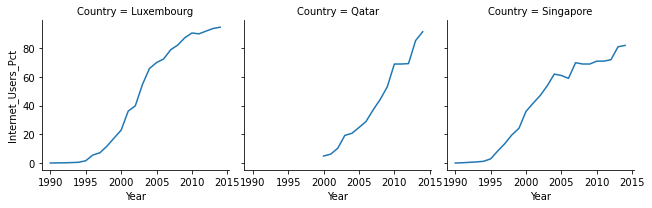

In [68]:
visual = sns.FacetGrid(in_use_over_time, col='Country')
visual.map(sns.lineplot, 'Year', 'Internet_Users_Pct')

30. Create a scatter plot of Internet Use vs GDP per Capita for the year 2014.
What do you notice?<br>
<span style="color:darkgreen">
Observations:<br>
The two variables have a positive correlation.<br> 
The data appears to be curved rather than linear, although this disappears somewhat when limiting the data to GDP < 40K. <br>
There is an extreme outlier at around 32K GDP, which is Equatorial Guinea.<br>

</span>

### <span style="color:green">Done</span>



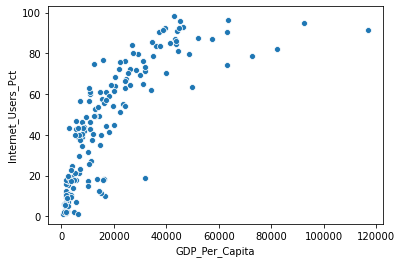

In [69]:
#gdp_and_internet_use_2014.sort_values(['GDP_Per_Capita'], ascending=False).head(3)
sns.scatterplot(data = gdp_and_internet_use_2014, x = 'GDP_Per_Capita', y = 'Internet_Users_Pct');

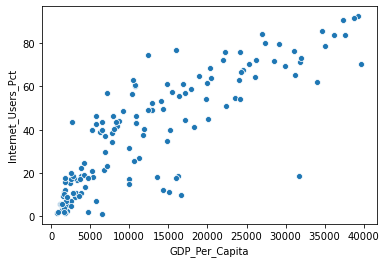

In [70]:
sns.scatterplot(data = gdp_and_internet_use_2014[gdp_and_internet_use_2014['GDP_Per_Capita'] < 40000], x = 'GDP_Per_Capita', y = 'Internet_Users_Pct');

In [71]:
gdp_and_internet_use_2014[(gdp_and_internet_use_2014['GDP_Per_Capita'] > 30000) & (gdp_and_internet_use_2014['Internet_Users_Pct'] < 20)]

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
967,Equatorial Guinea,2014,31743.410748,Africa,18.86



31. Find the correlation between GDP per Capita and Internet Use for the
year 2014. What is the meaning of this number?<br>

#### <span style="color:darkgreen">Correlation:</span>
<span style="color:darkgreen">.78<br>
Correlations between 0 and 1 are positive, and those between 0 and -1 are negative. Values closer to 1 and -1 indicate a stronger relationship, while values closer to 0 indicate a weaker relationship.<br>
</span>

### <span style="color:green">Done</span>


In [72]:
gdp_and_internet_use_2014[['GDP_Per_Capita','Internet_Users_Pct']].corr()

,GDP_Per_Capita,Internet_Users_Pct
GDP_Per_Capita,1.000000,0.787989
Internet_Users_Pct,0.787989,1.000000


32. Add a column to gdp_and_internet_use_2014 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP
per capita and internet users percentage. How does this compare to the
calculation in the previous part?<br>
 <span style="color:darkgreen">It has a higher correlation than the one with GDP_Per_Capita.</span>
###  <span style="color:green">Done</span>

In [74]:
gdp_and_internet_use_2014['Log_GDP_Per_Capita'] = np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])
#gdp_and_internet_use_2014['Log_GDP_Per_Capita'] = np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])


<ipython-input-74-a6faf01f2e13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['Log_GDP_Per_Capita'] = np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])


In [75]:
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,Log_GDP_Per_Capita
0,Afghanistan,2014,1795.735834,Asia,6.39,7.493170
13,Albania,2014,10700.993216,Europe,60.10,9.278092
34,Algeria,2014,13557.769757,Africa,18.09,9.514715
56,Angola,2014,6813.052106,Africa,21.26,8.826595
76,Antigua and Barbuda,2014,20440.540555,North America,64.00,9.925275


In [76]:
gdp_and_internet_use_2014.index

Int64Index([   0,   13,   34,   56,   76,   97,  121,  143,  161,  183,
            ...
            3297, 3318, 3343, 3368, 3390, 3411, 3431, 3455, 3475, 3497],
           dtype='int64', length=164)

In [77]:
gdp_and_internet_use_2014[['Log_GDP_Per_Capita','Internet_Users_Pct']].corr()

,Log_GDP_Per_Capita,Internet_Users_Pct
Log_GDP_Per_Capita,1.000000,0.884432
Internet_Users_Pct,0.884432,1.000000


33. Filter the original dataset down to just the United States for all available
years. Calculate correlation between internet use and gdp per capita. Is
this meaningful or useful?<br>
<span style="color:darkgreen">
It's somewhat meaningful, in that it tells you that there are at least some years where GDP and Usage were not perfectly correlated, but it's so close to 1 that it doesn't say a lot.</span><br>

###  <span style="color:green">Done</span>

In [78]:
gdp_and_internet_use[gdp_and_internet_use['Country']=='United States'][['GDP_Per_Capita','Internet_Users_Pct']].corr()

,GDP_Per_Capita,Internet_Users_Pct
GDP_Per_Capita,1.000000,0.991618
Internet_Users_Pct,0.991618,1.000000


Solo Exploration and Presentation:
1. Choose and download another data set from the UN data http://data.un.org/Explorer.aspx to merge with your data and explore. Prepare a short (<
5 minute) presentation of your findings. Report any interesting correlations
you find. Include visualizations and consider adding interactivity with
ipywidgets. This presentation can be done either in a Jupyter Notebook
or using another presentation software, such as PowerPoint. (Check out
Jupyter Slides if you have time. This allows you to turn your jupyter
notebook into a slideshow.
2. If time allows, check out the plotly library to add additional interativity
to your plots. https://plotly.com/python/plotly-express/)